In [5]:
flights_df <- read.csv('2008.csv.bz2')
head(df)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,⋯,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,⋯,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,2008,1,3,4,2003,1955,2211,2225,WN,335,⋯,4,8,0,,0,NA,NA,NA,NA,NA
2,2008,1,3,4,754,735,1002,1000,WN,3231,⋯,5,10,0,,0,NA,NA,NA,NA,NA
3,2008,1,3,4,628,620,804,750,WN,448,⋯,3,17,0,,0,NA,NA,NA,NA,NA
4,2008,1,3,4,926,930,1054,1100,WN,1746,⋯,3,7,0,,0,NA,NA,NA,NA,NA
5,2008,1,3,4,1829,1755,1959,1925,WN,3920,⋯,3,10,0,,0,2,0,0,0,32
6,2008,1,3,4,1940,1915,2121,2110,WN,378,⋯,4,10,0,,0,NA,NA,NA,NA,NA


In [6]:
library(dplyr)

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV +

In [17]:
sort(table(flights_df$UniqueCarrier), decreasing=TRUE)[0:10]


     WN      AA      OO      MQ      US      DL      UA      XE      NW      CO 
1201754  604885  567159  490693  453589  451931  449515  374510  347652  298455 

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions +
- National Air System
- security reasons

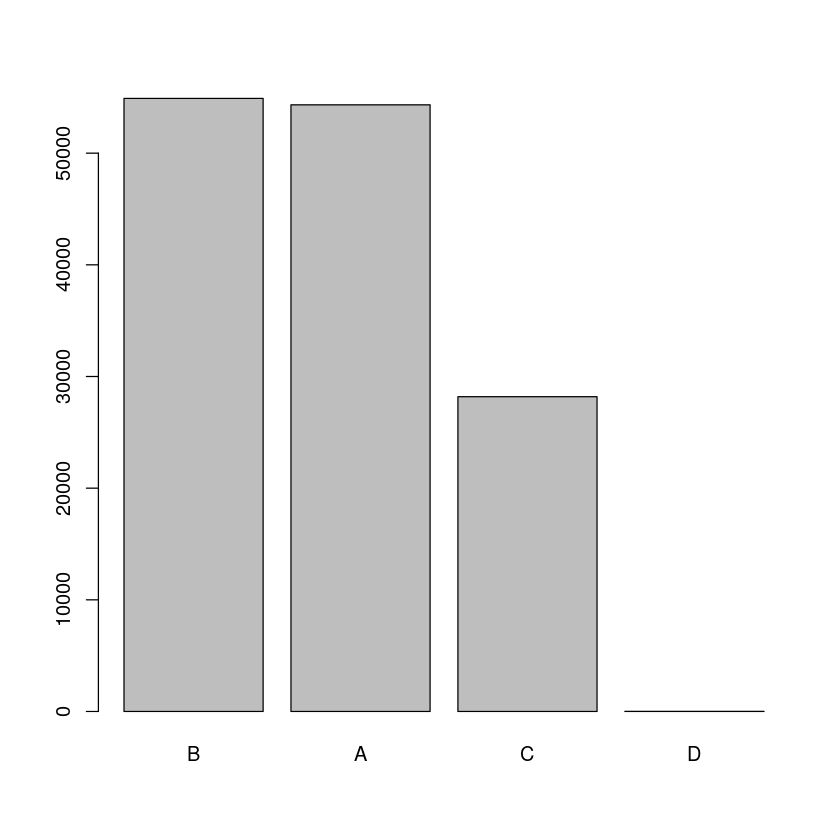

In [10]:
barplot(sort(table(flights_df$CancellationCode), decreasing=TRUE)[2:5])

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles +
 - San-Jose – Dallas
 - New-York – San-Francisco

In [24]:
del_flights = flights_df %>%
    group_by(Origin, Dest) %>%
        summarize(delays = n()) %>%
            arrange(desc(delays))
del_flights[1,]

Origin,Dest,delays
<fct>,<fct>,<int>
SFO,LAX,13788


**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 +

In [31]:
del_flights_weather = filter(flights_df, DepDelay > 0) %>%
    group_by(Origin, Dest) %>%
        summarize(delays = n(), weather = length(which(WeatherDelay > 0))) %>%
            arrange(desc(delays))
del_flights_weather[1:5,]
sum(del_flights_weather[1:5,]$weather)

Origin,Dest,delays,weather
<fct>,<fct>,<int>,<int>
LAX,SFO,6253,109
DAL,HOU,5742,133
SFO,LAX,5322,31
ORD,LGA,5311,266
HOU,DAL,5288,129


[1] 668

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm. +

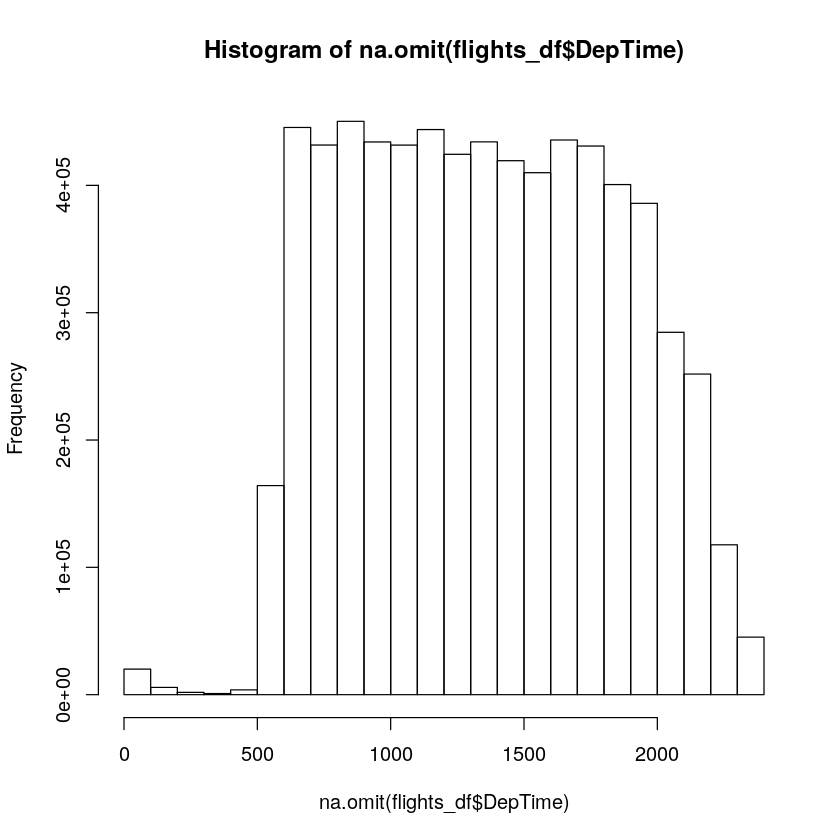

In [34]:
hist(na.omit(flights_df$DepTime))

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days). +
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer. +

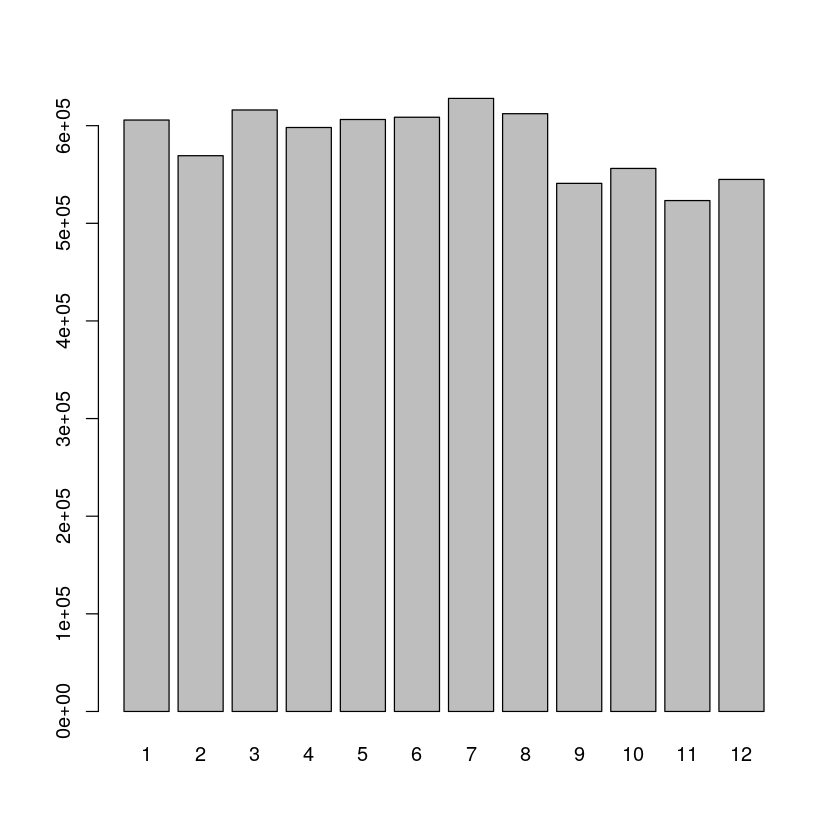

In [36]:
barplot(table(df$Month))

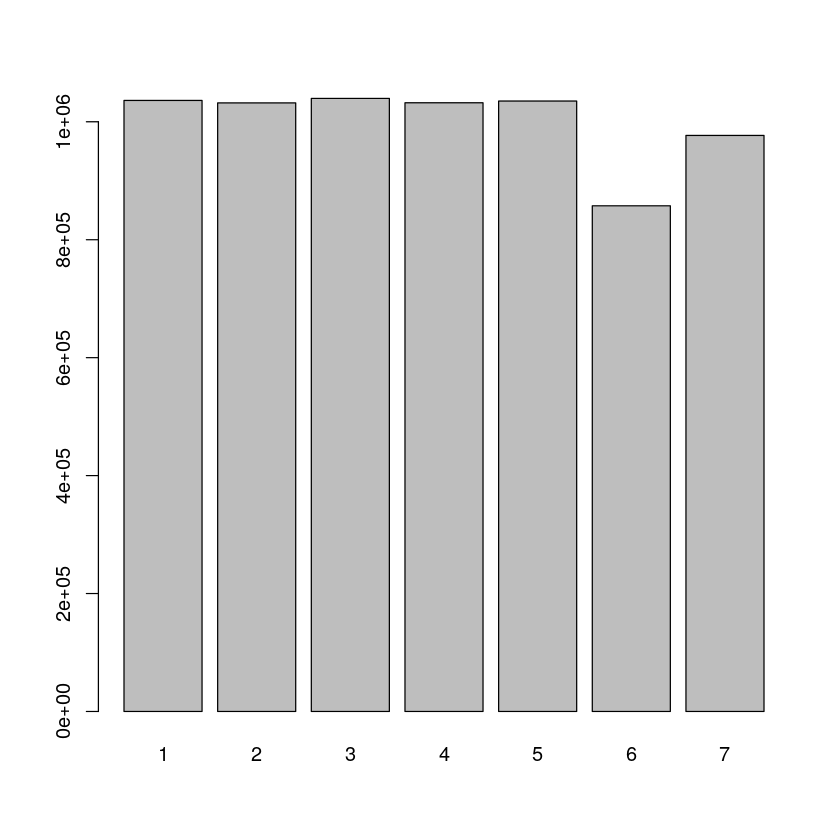

In [37]:
barplot(table(df$DayOfWeek))

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. +
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers. +
- Flights cancellations due to National Air System are more frequent than those due to carriers.

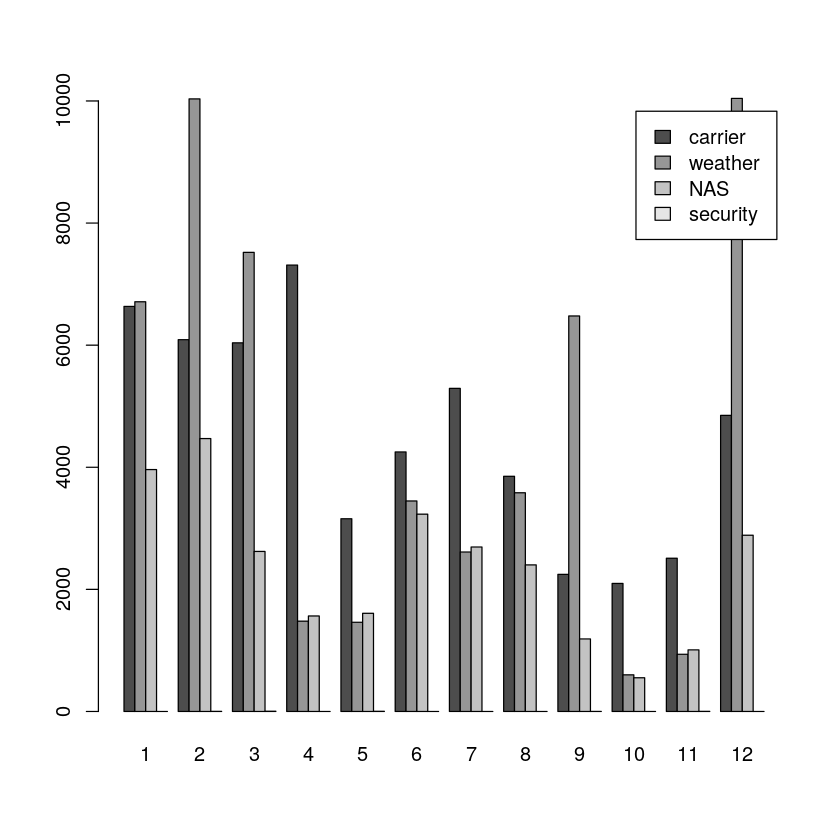

In [85]:
canc_reasons = flights_df %>% group_by(Month) %>%
    summarize(carrier = length(which(CancellationCode == 'A')),
              weather = length(which(CancellationCode == 'B')),
              NAS = length(which(CancellationCode == 'C')),
              security = length(which(CancellationCode == 'D')))

canc.data = rbind(c(canc_reasons$carrier),
                  c(canc_reasons$weather),
                  c(canc_reasons$NAS),
                  c(canc_reasons$security))
rownames(canc.data) = c('carrier', 'weather', 'NAS', 'security')
colnames(canc.data) = canc_reasons$Month
barplot(canc.data, legend.text = T, beside=T)

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April +

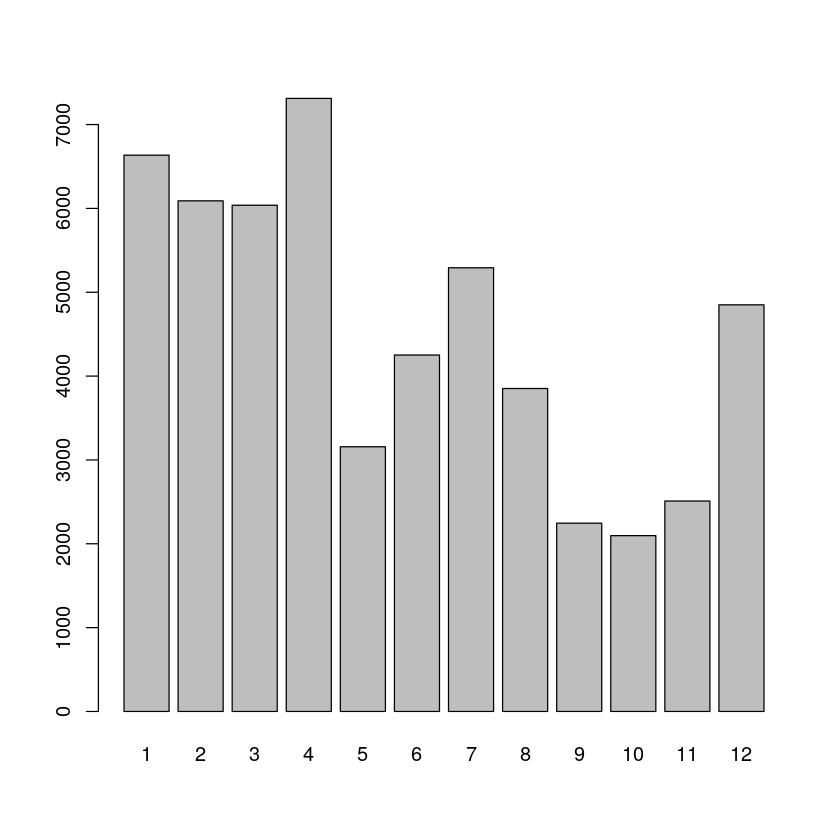

In [91]:
carrier_canc = filter(flights_df, CancellationCode == 'A')
barplot(table(carrier_canc$Month))

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA +

In [92]:
sort(table(carrier_canc$UniqueCarrier), decreasing=TRUE)[1]

AA 
9609

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ +

In [109]:
delays = filter(flights_df, ArrDelay >= 0 &
                            ArrDelay <= quantile(flights_df$DepDelay, 0.95, na.rm = TRUE) &
                            DepDelay >= 0 &
                            DepDelay <= quantile(df$DepDelay, 0.95, na.rm = TRUE))
delays %>% group_by(UniqueCarrier) %>%
    summarize(DepDelayMean = mean(DepDelay), ArrDelayMean = mean(ArrDelay)) %>%
        arrange(DepDelayMean, ArrDelayMean) %>% .[1:5,]

UniqueCarrier,DepDelayMean,ArrDelayMean
<fct>,<dbl>,<dbl>
AQ,9.945867,10.59400
HA,11.149687,13.46979
OH,13.764374,19.16886
F9,14.717851,16.99953
DL,16.131587,19.46146
